In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

path = '/content/scores_total.xlsx'
data = pd.read_excel(path)
data

,Linea,Horas,p-valor,best_aic,best_order,n_estimators,max_depth,learning_rate,reg_lambda,rmse_static,rmse_dynamic,rmse_xgboost
0,1,5,0.009090,9429.748079,"[7, 0, 7]",100,6,0.05,0.01,2448.163391,2604.128809,344.926546
1,1,6,0.024307,9724.576661,"[7, 0, 7]",100,12,0.10,1.00,3307.484824,3223.229363,1834.653154
2,1,7,0.026524,9625.343034,"[7, 0, 7]",100,4,0.10,1.00,2980.375770,2808.048558,994.184812
3,1,8,0.029185,9093.134529,"[7, 0, 7]",100,4,0.05,0.10,1742.174931,1741.179065,905.655692
4,1,9,0.053115,8791.334673,"[7, 1, 7]",100,4,0.10,1.00,1177.108171,1136.735691,878.591559
...,...,...,...,...,...,...,...,...,...,...,...,...
102,O,18,0.133020,7186.365915,"[7, 1, 7]",100,6,0.10,0.01,213.436079,198.248346,181.350037
103,O,19,0.165635,6812.182354,"[6, 1, 7]",100,4,0.10,0.01,137.267193,138.211799,115.659738
104,O,20,0.236249,6316.478340,"[5, 1, 7]",100,4,0.05,0.10,61.977482,61.826965,33.751410
105,O,21,0.165215,6529.987487,"[7, 1, 7]",100,4,0.10,1.00,50.658510,51.949362,38.994257


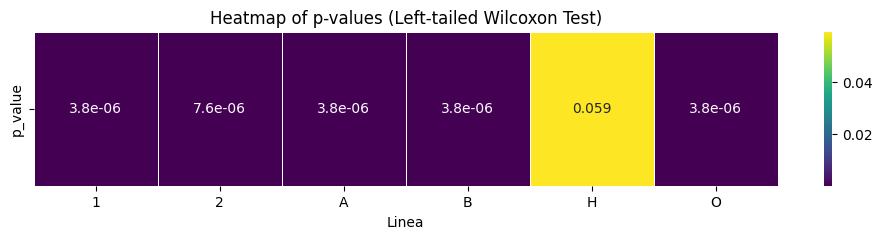

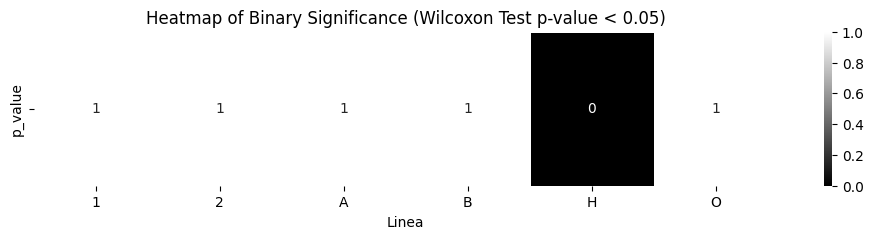

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Supongo que 'data' ya está cargado y contiene las columnas necesarias
data['Linea'] = data['Linea'].astype(str)

# Extraer las columnas relevantes del DataFrame
rmse_dynamic = data[['Linea', 'rmse_dynamic']]
rmse_xgboost = data[['Linea', 'rmse_xgboost']]

# Inicializar un DataFrame para almacenar los valores p
lines = data['Linea'].unique()
wilcoxon_p_values = pd.DataFrame(index=['p_value'], columns=lines)

# Realizar la prueba de Wilcoxon para cada 'Linea'
for linea in lines:
    rmse_dyn = rmse_dynamic[rmse_dynamic['Linea'] == linea]['rmse_dynamic'].values
    rmse_xgb = rmse_xgboost[rmse_xgboost['Linea'] == linea]['rmse_xgboost'].values
    if len(rmse_dyn) > 0 and len(rmse_xgb) > 0:
        stat, p = stats.wilcoxon(rmse_xgb, rmse_dyn, alternative='less')
        wilcoxon_p_values.loc['p_value', linea] = p
    else:
        wilcoxon_p_values.loc['p_value', linea] = np.nan

# Asegurarse de que los valores p se convierten a float para graficar
wilcoxon_p_values = wilcoxon_p_values.astype(float)

# Definir el tamaño de la figura
figsize = (12, 2)

# Graficar el heatmap con los valores p reales
plt.figure(figsize=figsize)
sns.heatmap(wilcoxon_p_values, annot=True, cmap='viridis', cbar=True, linewidths=.5,
            xticklabels=wilcoxon_p_values.columns, yticklabels=wilcoxon_p_values.index)
plt.title('Heatmap of p-values (Left-tailed Wilcoxon Test)')
plt.xlabel('Linea')
# plt.ylabel('p_value')
plt.show()

# Crear una matriz binaria basada en el umbral de p-valor (0.05)
binary_matrix_wilcoxon = (wilcoxon_p_values < 0.05).astype(int)

# Graficar el heatmap binario
plt.figure(figsize=figsize)
sns.heatmap(binary_matrix_wilcoxon, annot=True, cmap='gray', cbar=True, linewidths=.5,
            xticklabels=binary_matrix_wilcoxon.columns, yticklabels=binary_matrix_wilcoxon.index)
plt.title('Heatmap of Binary Significance (Wilcoxon Test p-value < 0.05)')
plt.xlabel('Linea')
# plt.ylabel('p_value')
plt.show()

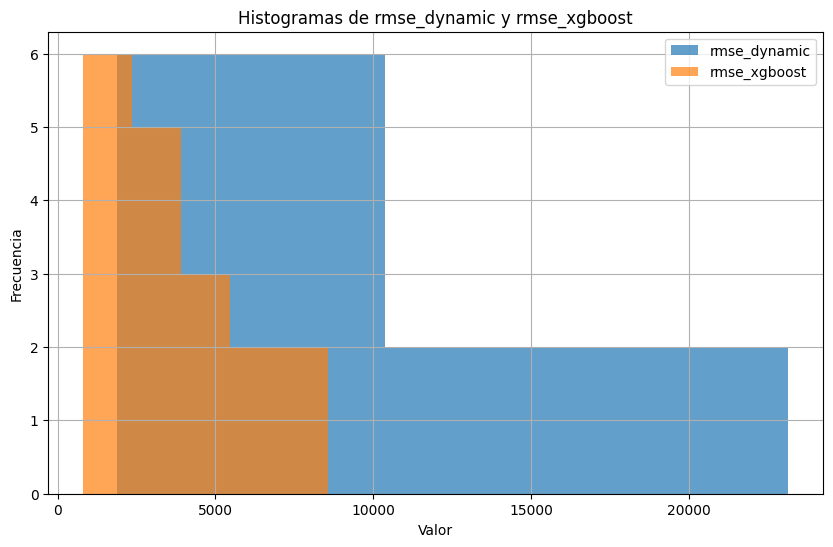

In [14]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(10, 6))

# Histograma para rmse_dynamic
num_bins = int(np.round(np.log2(len(data[data['Linea'] == 'A']['rmse_dynamic'])),0) + 1)
plt.hist(data[data['Linea'] == 'A']['rmse_dynamic'], bins=num_bins, alpha=0.7, label='rmse_dynamic')
# plt.hist(data[data['Linea'] == 'A']['rmse_dynamic'], alpha=0.7, label='rmse_dynamic')

# Histograma para rmse_xgboost
num_bins = int(np.round(np.log2(len(data[data['Linea'] == 'A']['rmse_xgboost'])),0) + 1)
plt.hist(data[data['Linea'] == 'A']['rmse_xgboost'], bins=num_bins, alpha=0.7, label='rmse_xgboost')
# plt.hist(data[data['Linea'] == 'A']['rmse_xgboost'], alpha=0.7, label='rmse_xgboost')

# Añadir título y etiquetas
plt.title('Histogramas de rmse_dynamic y rmse_xgboost')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el plot
plt.grid(True)
plt.show()

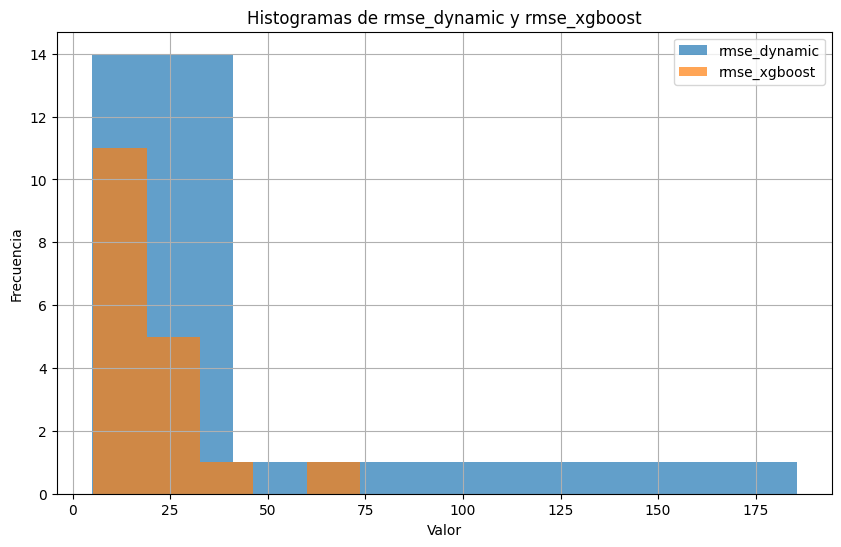

In [16]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(10, 6))

# Histograma para rmse_dynamic
num_bins = int(np.round(np.log2(len(data[data['Linea'] == 'A']['rmse_dynamic'])),0) + 1)
plt.hist(data[data['Linea'] == 'H']['rmse_dynamic'], bins=num_bins, alpha=0.7, label='rmse_dynamic')
# plt.hist(data[data['Linea'] == 'H']['rmse_dynamic'], alpha=0.7, label='rmse_dynamic')

# Histograma para rmse_xgboost
num_bins = int(np.round(np.log2(len(data[data['Linea'] == 'A']['rmse_xgboost'])),0) + 1)
plt.hist(data[data['Linea'] == 'H']['rmse_xgboost'], bins=num_bins, alpha=0.7, label='rmse_xgboost')
# plt.hist(data[data['Linea'] == 'H']['rmse_xgboost'], alpha=0.7, label='rmse_xgboost')

# Añadir título y etiquetas
plt.title('Histogramas de rmse_dynamic y rmse_xgboost')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el plot
plt.grid(True)
plt.show()

# FIN
---